# **Regresión Dinámica Inversa para IRB 140**

In [47]:
import math
import numpy as np
import tensorflow as tf
import keras 
#from tensorflow import keras
from keras.models import Sequential #One of the most important classes in tensorflow, used to creare NN (Named after NN as a sequence of layers)
from keras.layers import Dense, LSTM, BatchNormalization, Dropout #Dense layer means that one neuron in one layer is connected to all neurons in the next layer
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [49]:
model_name = "dp_backDyn_FF"     # val_loss=0.0016, 80 épocas, 50 mil muestras random
model_name = "dp_backDyn_FF_1"   # val_loss=0.0009, 171 épocas, 50 mil muestras random
fileNameScalers = f'/content/drive/My Drive/Colab Notebooks/{model_name}_scalers.pkl'
fileNameModel = f'/content/drive/My Drive/Colab Notebooks/{model_name}_.h5'

In [50]:
datos_IRB140_random = pd.read_csv(f'./irb140_randomsamples_2024_12_19-11_59_32.csv',delimiter=',', encoding="utf-8", skipinitialspace=True)
datos_IRB140_joint = pd.read_csv(f'./irb140_jointmovement_2024_12_16-14_11_37.csv',delimiter=',', encoding="utf-8", skipinitialspace=True)
datos_IRB140_cart = pd.read_csv(f'./irb140_cartesianmovement_2024_12_16-14_11_37.csv',delimiter=',', encoding="utf-8", skipinitialspace=True)
datos_IRB140_torq = pd.read_csv(f'./irb140_forcedtorques_sinusoidal_2024_12_16-14_11_37.csv',delimiter=',', encoding="utf-8", skipinitialspace=True)

In [51]:
pos_j1 = datos_IRB140_random.iloc[:,1].values
pos_j2 = datos_IRB140_random.iloc[:,2].values
pos_j3 = datos_IRB140_random.iloc[:,3].values
pos_j4 = datos_IRB140_random.iloc[:,4].values
pos_j5 = datos_IRB140_random.iloc[:,5].values
pos_j6 = datos_IRB140_random.iloc[:,6].values

vels_j1 = datos_IRB140_random.iloc[:,7].values
vels_j2 = datos_IRB140_random.iloc[:,8].values
vels_j3 = datos_IRB140_random.iloc[:,9].values
vels_j4 = datos_IRB140_random.iloc[:,10].values
vels_j5 = datos_IRB140_random.iloc[:,11].values
vels_j6 = datos_IRB140_random.iloc[:,12].values

accs_j1 = datos_IRB140_random.iloc[:,13].values
accs_j2 = datos_IRB140_random.iloc[:,14].values
accs_j3 = datos_IRB140_random.iloc[:,15].values
accs_j4 = datos_IRB140_random.iloc[:,16].values
accs_j5 = datos_IRB140_random.iloc[:,17].values
accs_j6 = datos_IRB140_random.iloc[:,18].values

torq_j1 = datos_IRB140_random.iloc[:,19].values
torq_j2 = datos_IRB140_random.iloc[:,20].values
torq_j3 = datos_IRB140_random.iloc[:,21].values
torq_j4 = datos_IRB140_random.iloc[:,22].values
torq_j5 = datos_IRB140_random.iloc[:,23].values
torq_j6 = datos_IRB140_random.iloc[:,24].values

In [52]:
time_joint = datos_IRB140_joint.iloc[:,1].values

pos_j1_joint = datos_IRB140_joint.iloc[:,2].values
pos_j2_joint = datos_IRB140_joint.iloc[:,3].values
pos_j3_joint = datos_IRB140_joint.iloc[:,4].values
pos_j4_joint = datos_IRB140_joint.iloc[:,5].values
pos_j5_joint = datos_IRB140_joint.iloc[:,6].values
pos_j6_joint = datos_IRB140_joint.iloc[:,7].values

vels_j1_joint = datos_IRB140_joint.iloc[:,8].values
vels_j2_joint = datos_IRB140_joint.iloc[:,9].values
vels_j3_joint = datos_IRB140_joint.iloc[:,10].values
vels_j4_joint = datos_IRB140_joint.iloc[:,11].values
vels_j5_joint = datos_IRB140_joint.iloc[:,12].values
vels_j6_joint = datos_IRB140_joint.iloc[:,13].values

accs_j1_joint = datos_IRB140_joint.iloc[:,14].values
accs_j2_joint = datos_IRB140_joint.iloc[:,15].values
accs_j3_joint = datos_IRB140_joint.iloc[:,16].values
accs_j4_joint = datos_IRB140_joint.iloc[:,17].values
accs_j5_joint = datos_IRB140_joint.iloc[:,18].values
accs_j6_joint = datos_IRB140_joint.iloc[:,19].values

torq_j1_joint = datos_IRB140_joint.iloc[:,20].values
torq_j2_joint = datos_IRB140_joint.iloc[:,21].values
torq_j3_joint = datos_IRB140_joint.iloc[:,22].values
torq_j4_joint = datos_IRB140_joint.iloc[:,23].values
torq_j5_joint = datos_IRB140_joint.iloc[:,24].values
torq_j6_joint = datos_IRB140_joint.iloc[:,25].values

In [53]:
time_cart = datos_IRB140_cart.iloc[:,1].values

pos_j1_cart = datos_IRB140_cart.iloc[:,2].values
pos_j2_cart = datos_IRB140_cart.iloc[:,3].values
pos_j3_cart = datos_IRB140_cart.iloc[:,4].values
pos_j4_cart = datos_IRB140_cart.iloc[:,5].values
pos_j5_cart = datos_IRB140_cart.iloc[:,6].values
pos_j6_cart = datos_IRB140_cart.iloc[:,7].values

vels_j1_cart = datos_IRB140_cart.iloc[:,8].values
vels_j2_cart = datos_IRB140_cart.iloc[:,9].values
vels_j3_cart = datos_IRB140_cart.iloc[:,10].values
vels_j4_cart = datos_IRB140_cart.iloc[:,11].values
vels_j5_cart = datos_IRB140_cart.iloc[:,12].values
vels_j6_cart = datos_IRB140_cart.iloc[:,13].values

accs_j1_cart = datos_IRB140_cart.iloc[:,14].values
accs_j2_cart = datos_IRB140_cart.iloc[:,15].values
accs_j3_cart = datos_IRB140_cart.iloc[:,16].values
accs_j4_cart = datos_IRB140_cart.iloc[:,17].values
accs_j5_cart = datos_IRB140_cart.iloc[:,18].values
accs_j6_cart = datos_IRB140_cart.iloc[:,19].values

torq_j1_cart = datos_IRB140_cart.iloc[:,20].values
torq_j2_cart = datos_IRB140_cart.iloc[:,21].values
torq_j3_cart = datos_IRB140_cart.iloc[:,22].values
torq_j4_cart = datos_IRB140_cart.iloc[:,23].values
torq_j5_cart = datos_IRB140_cart.iloc[:,24].values
torq_j6_cart = datos_IRB140_cart.iloc[:,25].values

In [54]:
time_torq = datos_IRB140_torq.iloc[:,1].values

pos_j1_torq = datos_IRB140_torq.iloc[:,2].values
pos_j2_torq = datos_IRB140_torq.iloc[:,3].values
pos_j3_torq = datos_IRB140_torq.iloc[:,4].values
pos_j4_torq = datos_IRB140_torq.iloc[:,5].values
pos_j5_torq = datos_IRB140_torq.iloc[:,6].values
pos_j6_torq = datos_IRB140_torq.iloc[:,7].values

vels_j1_torq = datos_IRB140_torq.iloc[:,8].values
vels_j2_torq = datos_IRB140_torq.iloc[:,9].values
vels_j3_torq = datos_IRB140_torq.iloc[:,10].values
vels_j4_torq = datos_IRB140_torq.iloc[:,11].values
vels_j5_torq = datos_IRB140_torq.iloc[:,12].values
vels_j6_torq = datos_IRB140_torq.iloc[:,13].values

accs_j1_torq = datos_IRB140_torq.iloc[:,14].values
accs_j2_torq = datos_IRB140_torq.iloc[:,15].values
accs_j3_torq = datos_IRB140_torq.iloc[:,16].values
accs_j4_torq = datos_IRB140_torq.iloc[:,17].values
accs_j5_torq = datos_IRB140_torq.iloc[:,18].values
accs_j6_torq = datos_IRB140_torq.iloc[:,19].values

torq_j1_torq = datos_IRB140_torq.iloc[:,20].values
torq_j2_torq = datos_IRB140_torq.iloc[:,21].values
torq_j3_torq = datos_IRB140_torq.iloc[:,22].values
torq_j4_torq = datos_IRB140_torq.iloc[:,23].values
torq_j5_torq = datos_IRB140_torq.iloc[:,24].values
torq_j6_torq = datos_IRB140_torq.iloc[:,25].values

In [55]:
time_torq.shape


(1000,)

Text(0.5, 1.0, 'Torques')

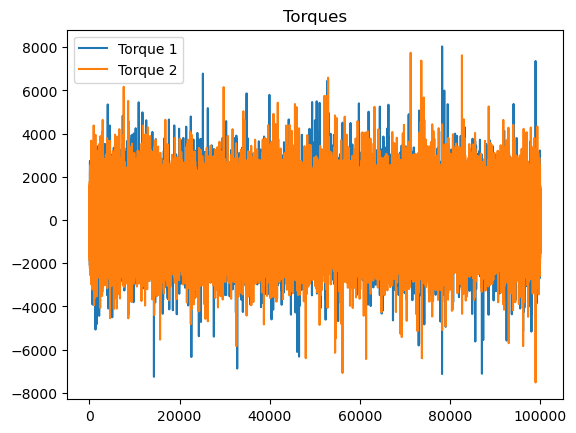

In [56]:
plt.plot(torq_j1[:],label='Torque 1')
plt.plot(torq_j2[:],label='Torque 2')
plt.legend()
plt.show
plt.title(r'Torques')

In [57]:
# Vamos a entrenar!!
# Preparo el visor para ir siguiendo el entrenamiento
#%load_ext tensorboard
#%tensorboard --logdir logs/fit

# **Red neuronal Secuencial (Same-step approach)**:

No es el entrenamiento de las redes lo que se compara, sino la calidad de los resultados finales. Cada red tiene una técnica de entrenamiento: las secuenciales no aprenden la correlación entre muestras, entonces es mejor entrenarlas con muestras descorrelacionadas -> ruido blanco, en cambio, las redes LSTM aprenden la historia y evolución del sistema (la correlación entre muestras), van a necesitar muestras ordenadas, secuencia de tiempo.

Problema Dinámico INVERSO: Dados las posiciones, velocidades y aceleraciones joint, obtener el valor de los torques necesarios para mantener esa posición.

En el método de same step approach, tengo que tener en cuenta cómo se describe la fórmula a analizar. Para el problema inverso, tengo en cuenta que la expresión de la dinámica es una función contínua, pero todo refiere al mismo instante de tiempo, ya que dadas las posiciones, velocidades y aceleraciones, el valor de torque obtenido es aquel para mantener esta posición. Entonces los valores de posición y velocidad son para el instante de tiempo del torque resultante. 

In [58]:
#inputs = np.vstack((pos_j1, pos_j2, vels_j1, vels_j2, accs_j1, accs_j2)).T
inputs = np.vstack((pos_j1, pos_j2, pos_j3, pos_j4, pos_j5, pos_j6, vels_j1, vels_j2, vels_j3, vels_j4, vels_j5, vels_j6, accs_j1, accs_j2, accs_j3, accs_j4, accs_j5, accs_j6)).T

In [59]:
#outputs = np.vstack((accs_j1, accs_j2)).T
outputs = np.vstack((torq_j1, torq_j2, torq_j3, torq_j4, torq_j5, torq_j6)).T

In [60]:
# Defino el conjunto de datos que voy a usar para entrenar y el que voy a usar para validar (test) -> Porcentajes similares al usados en el paper
X_train_SS, X_test_SS, y_train_SS, y_test_SS = train_test_split(inputs, outputs, test_size = 0.15)
X_train_SS, X_val_SS, y_train_SS, y_val_SS = train_test_split(X_train_SS, y_train_SS, test_size=0.15)

In [61]:
#Tengo que hacer preprocesado de los datos para que los calculos no sean tan pesados
scaler1_SS = MinMaxScaler()
X_train_SS = scaler1_SS.fit_transform(X_train_SS)#Primero se llama a la funcion fit para que ajuste los datos
X_test_SS = scaler1_SS.transform(X_test_SS) #Una vez que los datos fueron ajustados se puede llamar a la transformacion directamente
X_val_SS = scaler1_SS.transform(X_val_SS)

#Lo mismo para los outputs
scaler2_SS = MinMaxScaler() #Otra forma de ESCALAR ---> scaler = StandardScaler()
y_train_SS = scaler2_SS.fit_transform(y_train_SS)
y_test_SS = scaler2_SS.transform(y_test_SS)
y_val_SS = scaler2_SS.transform(y_val_SS)

In [62]:
FFNN_SS_network = Sequential()
#Definition of input and first hidden layer (using relu function for activation)
#Input only for the first layer
FFNN_SS_network.add(Dense(input_shape = (inputs.shape[1],), units = 100, activation = 'relu')) # 2x8x4x2
#Definition of second hidden layer (using relu function for activation)
FFNN_SS_network.add(Dense(units=100, activation='relu')) # 2x8x4
FFNN_SS_network.add(Dense(units=50, activation='relu'))
FFNN_SS_network.add(Dense(units=50, activation='relu'))
FFNN_SS_network.add(Dense(units=50, activation='relu')) # 2x8
#FFNN_SS_network.add(Dense(units=12, activation='relu')) # 2x6
#Output layer sin activation ya que es un problema de regresion
FFNN_SS_network.add(Dense(units = outputs.shape[1])) #2

FFNN_SS_network.summary()

/Users/melinagabrielacheminet/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 100)            │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,456 (87.72 KB)

 Trainable params: 22,456 (87.72 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
FFNN_SS_network.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['mae'])#Que pasa si uso SGD con learning rate

In [64]:
#checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/CT_p/2LPR/Modelos_NN/FF_NN_EPOCHS/ff_nn-{epoch:02d}.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint("./ID_NN/Modelos_NN/FF_NN/FF_NN_nn_Best_Model.keras", save_best_only=True)
#checkpoint_cb = keras.callbacks.ModelCheckpoint("./ID_NN/Modelos_NN/FF_NN_EPOCHS/ff_nn-{epoch:02d}.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30,  min_delta=1E-10, restore_best_weights=True)

In [65]:
FFNN_SS_history = FFNN_SS_network.fit(X_train_SS, y_train_SS, batch_size=100, epochs=300, validation_data=(X_val_SS, y_val_SS), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0126 - mae: 0.0621 - val_loss: 0.0021 - val_mae: 0.0323
Epoch 2/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0022 - mae: 0.0328 - val_loss: 0.0021 - val_mae: 0.0315
Epoch 3/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mae: 0.0320 - val_loss: 0.0022 - val_mae: 0.0338
Epoch 4/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mae: 0.0320 - val_loss: 0.0021 - val_mae: 0.0317
Epoch 5/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021 - mae: 0.0318 - val_loss: 0.0020 - val_mae: 0.0314
Epoch 6/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0020 - val_mae: 0.0314
Epoch 7/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0021 - mae: 0.0316 - val_loss: 0.0020 - val_mae: 0.0310
Epoch 8/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0020 - mae: 0.0313 - val_loss: 0.0019 - val_mae: 0.0303
Epoch 9/300
723/723 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

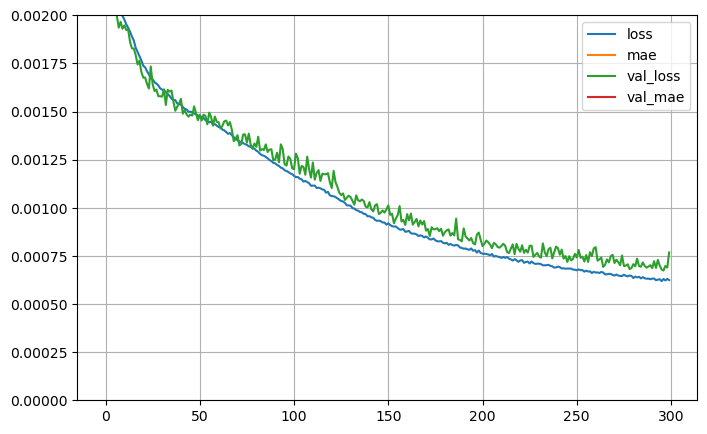

In [66]:
pd.DataFrame(FFNN_SS_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 0.002)
plt.show()

In [67]:
accuracy_test_SS = FFNN_SS_network.evaluate(X_test_SS, y_test_SS)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 6.6494e-04 - mae: 0.0176


In [68]:
predictions_SS = FFNN_SS_network.predict(X_test_SS)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


In [69]:
predictions_SS[0]

array([0.44531563, 0.36547065, 0.2920009 , 0.61843556, 0.6207752 ,
       0.4041521 ], dtype=float32)

In [70]:
y_test_SS[0]

array([0.44279848, 0.36784446, 0.301367  , 0.62413684, 0.60897843,
       0.39473904])

# **Red neuronal Secuencial (One-step-ahead approach)**

¿Es válido hacer un análisis One Step Ahead si el problema dinámico inverso se plantea como dadas las posiciones, velocidades y aceleraciones joint, obtener el valor de los torques necesarios para mantener esa posición?

Para el análisis con los datos randomizados, no tengo una secuencialidad de los datos ya que cada muestra es randomizada. Voy a probarlo con otro conjunto de muestras, pero inicialmente, creería que para resolver el problema dinámico no tiene sentido utilizar este método.

# **Red neuronal LSTM**

En primer lugar, voy a probar el entrenamiento con movimiento joint

In [71]:
#Inputs ---> uk=[qTk-1  d_qTk-1  tauTk]T
time_joint = datos_IRB140_joint.iloc[1:-1,1].values

pos_j1_joint = datos_IRB140_joint.iloc[:-2,2].values
pos_j2_joint = datos_IRB140_joint.iloc[:-2,3].values
pos_j3_joint = datos_IRB140_joint.iloc[:-2,4].values
pos_j4_joint = datos_IRB140_joint.iloc[:-2,5].values
pos_j5_joint = datos_IRB140_joint.iloc[:-2,6].values
pos_j6_joint = datos_IRB140_joint.iloc[:-2,7].values

vels_j1_joint = datos_IRB140_joint.iloc[:-2,8].values
vels_j2_joint = datos_IRB140_joint.iloc[:-2,9].values
vels_j3_joint = datos_IRB140_joint.iloc[:-2,10].values
vels_j4_joint = datos_IRB140_joint.iloc[:-2,11].values
vels_j5_joint = datos_IRB140_joint.iloc[:-2,12].values
vels_j6_joint = datos_IRB140_joint.iloc[:-2,13].values

accs_j1_joint = datos_IRB140_joint.iloc[1:-1,14].values
accs_j2_joint = datos_IRB140_joint.iloc[1:-1,15].values
accs_j3_joint = datos_IRB140_joint.iloc[1:-1,16].values
accs_j4_joint = datos_IRB140_joint.iloc[1:-1,17].values
accs_j5_joint = datos_IRB140_joint.iloc[1:-1,18].values
accs_j6_joint = datos_IRB140_joint.iloc[1:-1,19].values

torq_j1_joint = datos_IRB140_joint.iloc[1:-1,20].values
torq_j2_joint = datos_IRB140_joint.iloc[1:-1,21].values
torq_j3_joint = datos_IRB140_joint.iloc[1:-1,22].values
torq_j4_joint = datos_IRB140_joint.iloc[1:-1,23].values
torq_j5_joint = datos_IRB140_joint.iloc[1:-1,24].values
torq_j6_joint = datos_IRB140_joint.iloc[1:-1,25].values


In [72]:
inputs_joint = np.vstack((pos_j1_joint, pos_j2_joint, pos_j3_joint, pos_j4_joint, pos_j5_joint, pos_j6_joint, vels_j1_joint, vels_j2_joint, vels_j3_joint, vels_j4_joint, vels_j5_joint, vels_j6_joint, accs_j1_joint, accs_j2_joint, accs_j3_joint, accs_j4_joint, accs_j5_joint, accs_j6_joint)).T
#outputs = np.vstack((accs_j1, accs_j2, accs_j3, accs_j4, accs_j5, accs_j6)).T
outputs_joint = np.vstack((torq_j1_joint, torq_j2_joint, torq_j3_joint, torq_j4_joint, torq_j5_joint, torq_j6_joint)).T

In [73]:
def create_lstm_sequences(inputs, outputs, time_joint, window_size=50, split=0.8):
    """
    Genera secuencias de entrada y salida para una LSTM a partir de los datos de posición, velocidad, aceleración y torque.
    
    Args:
        inputs: Matriz de entrada que contiene las posiciones, velocidades y aceleraciones.
        outputs: Matriz de salida que contiene los torques.
        time_joint: Vector de tiempo asociado a los datos.
        window_size: Tamaño de la ventana de tiempo para la LSTM.
        split: Proporción del dataset que se utiliza para entrenamiento (el resto para prueba).
        
    Returns:
        X_train: Secuencias de entrada para entrenamiento.
        Y_train: Secuencias de salida para entrenamiento.
        X_test: Secuencias de entrada para prueba.
        Y_test: Secuencias de salida para prueba.
        t_test: Vector de tiempo correspondiente al conjunto de prueba.
    """
    # Preparar las secuencias de entrada y salida usando ventanas deslizantes
    input_sequences = []
    output_sequences = []
    
    for i in range(len(inputs) - window_size):
        input_sequences.append(inputs[i:i+window_size])
        output_sequences.append(outputs[i+window_size])
    
    # Convertir a arrays numpy
    X = np.array(input_sequences)
    Y = np.array(output_sequences)
    
    # Dividir en conjuntos de entrenamiento y prueba
    if split > 0 and split < 1:
        idx_split = int(split * len(X))
        X_train, X_test = X[:idx_split], X[idx_split:]
        Y_train, Y_test = Y[:idx_split], Y[idx_split:]
        t_test = time_joint[idx_split:len(inputs) - window_size]
    else:
        X_train, X_test = X, None
        Y_train, Y_test = Y, None
        t_test = time_joint[:len(inputs) - window_size]
    
    return X_train, Y_train, X_test, Y_test, t_test


In [74]:
#Para las LSTM es necesario que defin
# N_segments = 50 #Puntos destino de movimiento joint

# Definir el tamaño de la ventana de tiempo para las secuencias
w_size = 6

# Preprocesar (escalar) los inputs y outputs antes de crear las secuencias
scaler1_LSTM = MinMaxScaler()
inputs_joint = scaler1_LSTM.fit_transform(inputs_joint)

scaler2_LSTM = MinMaxScaler()
outputs_joint = scaler2_LSTM.fit_transform(outputs_joint)

X_train_LSTM, y_train_LSTM, X_test_LSTM, y_test_LSTM, t_test_LSTM  = create_lstm_sequences(inputs_joint, outputs_joint, time_joint, window_size=w_size, split=0.8)

In [75]:
print(X_train_LSTM.shape)  # Verifica el tamaño de las muestras
print(y_train_LSTM.shape)  # Verifica el tamaño de las etiquetas


(63287, 6, 18)
(63287, 6)


In [76]:
LSTM_network = Sequential()
LSTM_network.add(LSTM(units=50, dropout=0, input_shape=(w_size, X_train_LSTM.shape[2]), activation='tanh', return_sequences=True))#, kernel_regularizer=l2(0.005)))
#LSTM_network.add(LSTM(35, dropout=0.05, activation='tanh', return_sequences=True)) #, kernel_regularizer=l2(0.0005)
LSTM_network.add(LSTM(50, dropout=0, activation='tanh'))
LSTM_network.add(Dense(y_train_LSTM.shape[1]))
# Compile the model
LSTM_network.compile(loss = 'mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=1e-6), metrics = ['mae'])
LSTM_network.summary()

/Users/melinagabrielacheminet/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 6, 50)          │        13,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,306 (134.01 KB)

 Trainable params: 34,306 (134.01 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
LSTM_checkpoint_cb = keras.callbacks.ModelCheckpoint("./ID_NN/Modelos_NN/LSTM/LSTM_nn_Best_Model.keras", save_best_only=True)
#LSTM_checkpoint_cb = keras.callbacks.ModelCheckpoint("./ID_NN/Modelos_NN/LINEAR/LSTM_nn_Best_Model.keras",save_best_only=True)
LSTM_early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, min_delta=1E-10, restore_best_weights=True, baseline=None)

#Para el caso de Joint el min_delta parece ser muy bajo -> mentira, no estaba escalando bien los datos

In [78]:
LSTM_history = LSTM_network.fit(X_train_LSTM, y_train_LSTM, epochs=1000, batch_size=170, callbacks=[LSTM_checkpoint_cb, LSTM_early_stopping_cb], validation_split=0.2)

Epoch 1/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.2800 - mae: 0.5027 - val_loss: 0.2492 - val_mae: 0.4731
Epoch 2/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.2687 - mae: 0.4918 - val_loss: 0.2385 - val_mae: 0.4620
Epoch 3/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2573 - mae: 0.4806 - val_loss: 0.2283 - val_mae: 0.4510
Epoch 4/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2469 - mae: 0.4698 - val_loss: 0.2185 - val_mae: 0.4401
Epoch 5/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2365 - mae: 0.4593 - val_loss: 0.2089 - val_mae: 0.4293
Epoch 6/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2263 - mae: 0.4485 - val_loss: 0.1996 - val_mae: 0.4186
Epoch 7/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2167 - mae: 0.4380 - val_loss: 0.1905 - val_mae: 0.4078
Epoch 8/1000
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2076 - mae: 0.4277 - val_loss: 0.1816 - val_mae: 0.3970
Epoch 9/1000
298/298 ━━━━━━━━━━━

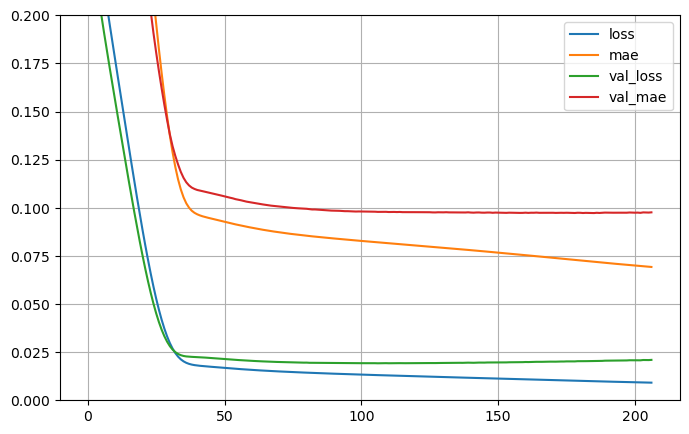

In [79]:
pd.DataFrame(LSTM_history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 0.2)
plt.show()

In [80]:
LSTM_accuracy_test = LSTM_network.evaluate(X_test_LSTM, y_test_LSTM)

495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0144 - mae: 0.0868


In [81]:
predictions_LSTM = LSTM_network.predict(X_test_LSTM)

495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [82]:
predictions_LSTM[0]

array([0.4988717 , 0.6680925 , 0.5530104 , 0.47577876, 0.4872054 ,
       0.5344133 ], dtype=float32)

In [83]:
y_test_LSTM[0]

array([0.48639668, 0.82595468, 0.58410047, 0.49479444, 0.43154633,
       0.47268491])

# **Comparación de Modelos NN con otro conjunto de datos**

La comparación de los modelos 

In [84]:
#Uso el otro dataset joint
datos_IRB140_ref_joint = datos_IRB140_joint
#datos_IRB140_ref_joint = pd.read_csv(f'./irb140_jointmovement_2024_12_17-14_07_51.csv',delimiter=',', encoding="utf-8", skipinitialspace=True)
#datos_IRB140_ref_joint.head()
t_ref = datos_IRB140_ref_joint.iloc[1:-1,1].values

q1_ref = datos_IRB140_ref_joint.iloc[:-2,2].values
q2_ref = datos_IRB140_ref_joint.iloc[:-2,3].values
q3_ref = datos_IRB140_ref_joint.iloc[:-2,4].values
q4_ref = datos_IRB140_ref_joint.iloc[:-2,5].values
q5_ref = datos_IRB140_ref_joint.iloc[:-2,6].values
q6_ref = datos_IRB140_ref_joint.iloc[:-2,7].values

dq1_ref = datos_IRB140_ref_joint.iloc[:-2,8].values
dq2_ref = datos_IRB140_ref_joint.iloc[:-2,9].values
dq3_ref = datos_IRB140_ref_joint.iloc[:-2,10].values
dq4_ref = datos_IRB140_ref_joint.iloc[:-2,11].values
dq5_ref = datos_IRB140_ref_joint.iloc[:-2,12].values
dq6_ref = datos_IRB140_ref_joint.iloc[:-2,13].values

ddq1_ref = datos_IRB140_ref_joint.iloc[1:-1,14].values
ddq2_ref = datos_IRB140_ref_joint.iloc[1:-1,15].values
ddq3_ref = datos_IRB140_ref_joint.iloc[1:-1,16].values
ddq4_ref = datos_IRB140_ref_joint.iloc[1:-1,17].values
ddq5_ref = datos_IRB140_ref_joint.iloc[1:-1,18].values
ddq6_ref = datos_IRB140_ref_joint.iloc[1:-1,18].values

t1_ref = datos_IRB140_ref_joint.iloc[1:-1,20].values
t2_ref = datos_IRB140_ref_joint.iloc[1:-1,21].values
t3_ref = datos_IRB140_ref_joint.iloc[1:-1,22].values
t4_ref = datos_IRB140_ref_joint.iloc[1:-1,23].values
t5_ref = datos_IRB140_ref_joint.iloc[1:-1,24].values
t6_ref = datos_IRB140_ref_joint.iloc[1:-1,25].values

datos_IRB140_ref_joint.head()

,ID,Time,Theta_1,Theta_2,Theta_3,Theta_4,Theta_5,Theta_6,D_Theta_1,D_Theta_2,...,DD_Theta_3,DD_Theta_4,DD_Theta_5,DD_Theta_6,Torque_1,Torque_2,Torque_3,Torque_4,Torque_5,Torque_6
0,1,0.000,2.007479,-0.707445,3.000962,-2.523383,-1.510045,-1.365260,-0.002178,-0.000006,...,-5.0,4.87141,1.540089,4.906829,-25.602093,104.149101,-4.556868,11.167464,10.279606,0.890128
1,2,0.001,2.007476,-0.707445,3.000955,-2.523375,-1.510043,-1.365253,-0.004357,-0.000012,...,-5.0,4.87141,1.540089,4.906829,-25.602504,104.149078,-4.556470,11.167699,10.279308,0.890061
2,3,0.002,2.007470,-0.707445,3.000942,-2.523363,-1.510039,-1.365241,-0.006535,-0.000018,...,-5.0,4.87141,1.540089,4.906829,-25.603190,104.149038,-4.555806,11.168089,10.278811,0.889949
3,4,0.003,2.007463,-0.707445,3.000925,-2.523346,-1.510034,-1.365224,-0.008714,-0.000024,...,-5.0,4.87141,1.540089,4.906829,-25.604150,104.148982,-4.554877,11.168636,10.278115,0.889792
4,5,0.004,2.007453,-0.707445,3.000902,-2.523324,-1.510027,-1.365201,-0.010892,-0.000030,...,-5.0,4.87141,1.540089,4.906829,-25.605385,104.148910,-4.553683,11.169340,10.277220,0.889590


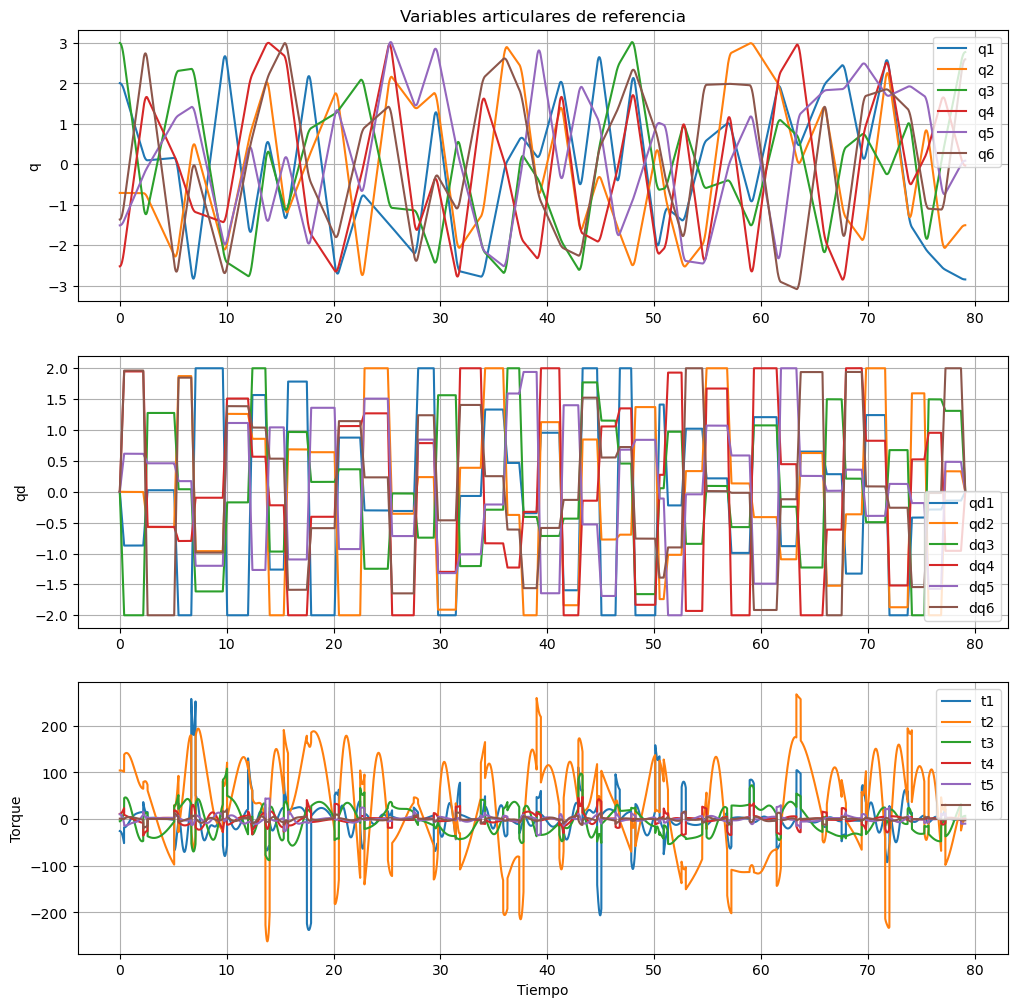

In [85]:
num_links = 6

plt.figure(figsize=(12, 12))  # Cambia el tamaño según tus necesidades
plt.subplot(3,1,1)
plt.plot(t_ref, q1_ref)
plt.plot(t_ref, q2_ref)
plt.plot(t_ref, q3_ref)
plt.plot(t_ref, q4_ref)
plt.plot(t_ref, q5_ref)
plt.plot(t_ref, q6_ref)
plt.grid(True)
plt.legend(['q1', 'q2', 'q3', 'q4', 'q5', 'q6']);  plt.ylabel('q')
plt.title('Variables articulares de referencia')
plt.subplot(3,1,2)
plt.plot(t_ref, dq1_ref)
plt.plot(t_ref, dq2_ref)
plt.plot(t_ref, dq3_ref)
plt.plot(t_ref, dq4_ref)
plt.plot(t_ref, dq5_ref)
plt.plot(t_ref, dq6_ref)
plt.grid(True)
plt.legend(['qd1', 'qd2', 'dq3', 'dq4', 'dq5', 'dq6']);  plt.ylabel('qd')
plt.subplot(3,1,3)
plt.plot(t_ref, t1_ref)
plt.plot(t_ref, t2_ref)
plt.plot(t_ref, t3_ref)
plt.plot(t_ref, t4_ref)
plt.plot(t_ref, t5_ref)
plt.plot(t_ref, t6_ref)
plt.grid(True)
plt.legend(['t1', 't2', 't3', 't4', 't5', 't6']); plt.xlabel('Tiempo'); plt.ylabel('Torque')
plt.show()


In [86]:
inputs_ref = np.vstack((q1_ref,q2_ref,q3_ref,q4_ref,q5_ref,q6_ref,dq1_ref,dq2_ref,dq3_ref,dq4_ref,dq5_ref,dq6_ref,ddq1_ref,ddq2_ref,ddq3_ref,ddq4_ref,ddq5_ref,ddq6_ref)).T
#inputs_ref_LSTM = np.vstack((q1_ref,q2_ref,q3_ref,q4_ref,q5_ref,q6_ref,t1_ref,t2_ref,t3_ref,t4_ref,t5_ref,t6_ref)).T
outputs_ref = np.vstack((t1_ref,t2_ref,t3_ref,t4_ref,t5_ref,t6_ref)).T

In [87]:
#Primero con FF NN

X_test_scaled_FF_NN = scaler1_SS.transform(inputs_ref)
tau_sim_FF_NN = scaler2_SS.inverse_transform(FFNN_SS_network.predict(X_test_scaled_FF_NN))

2473/2473 ━━━━━━━━━━━━━━━━━━━━ 2s 628us/step


In [88]:
#Ahora con LSTM

def create_sequences_with_time(data, time, window_size= w_size):
    sequences = []
    times = []
    
    for i in range(len(data) - window_size + 1):
        sequence = data[i:i + window_size]
        sequences.append(sequence)
        
        # Obtener el tiempo correspondiente al centro de la ventana
        time_center = time[i + window_size // 2]  # Usa el centro de la ventana
        times.append(time_center)
    
    return np.array(sequences), np.array(times)

X_test_scaled_LSTM = scaler1_LSTM.transform(inputs_ref)
X_test_windowed_LSTM, t_ref_LSTM = create_sequences_with_time(X_test_scaled_LSTM, t_ref)
tau_sim_LSTM = scaler2_LSTM.inverse_transform(LSTM_network.predict(X_test_windowed_LSTM))

2473/2473 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


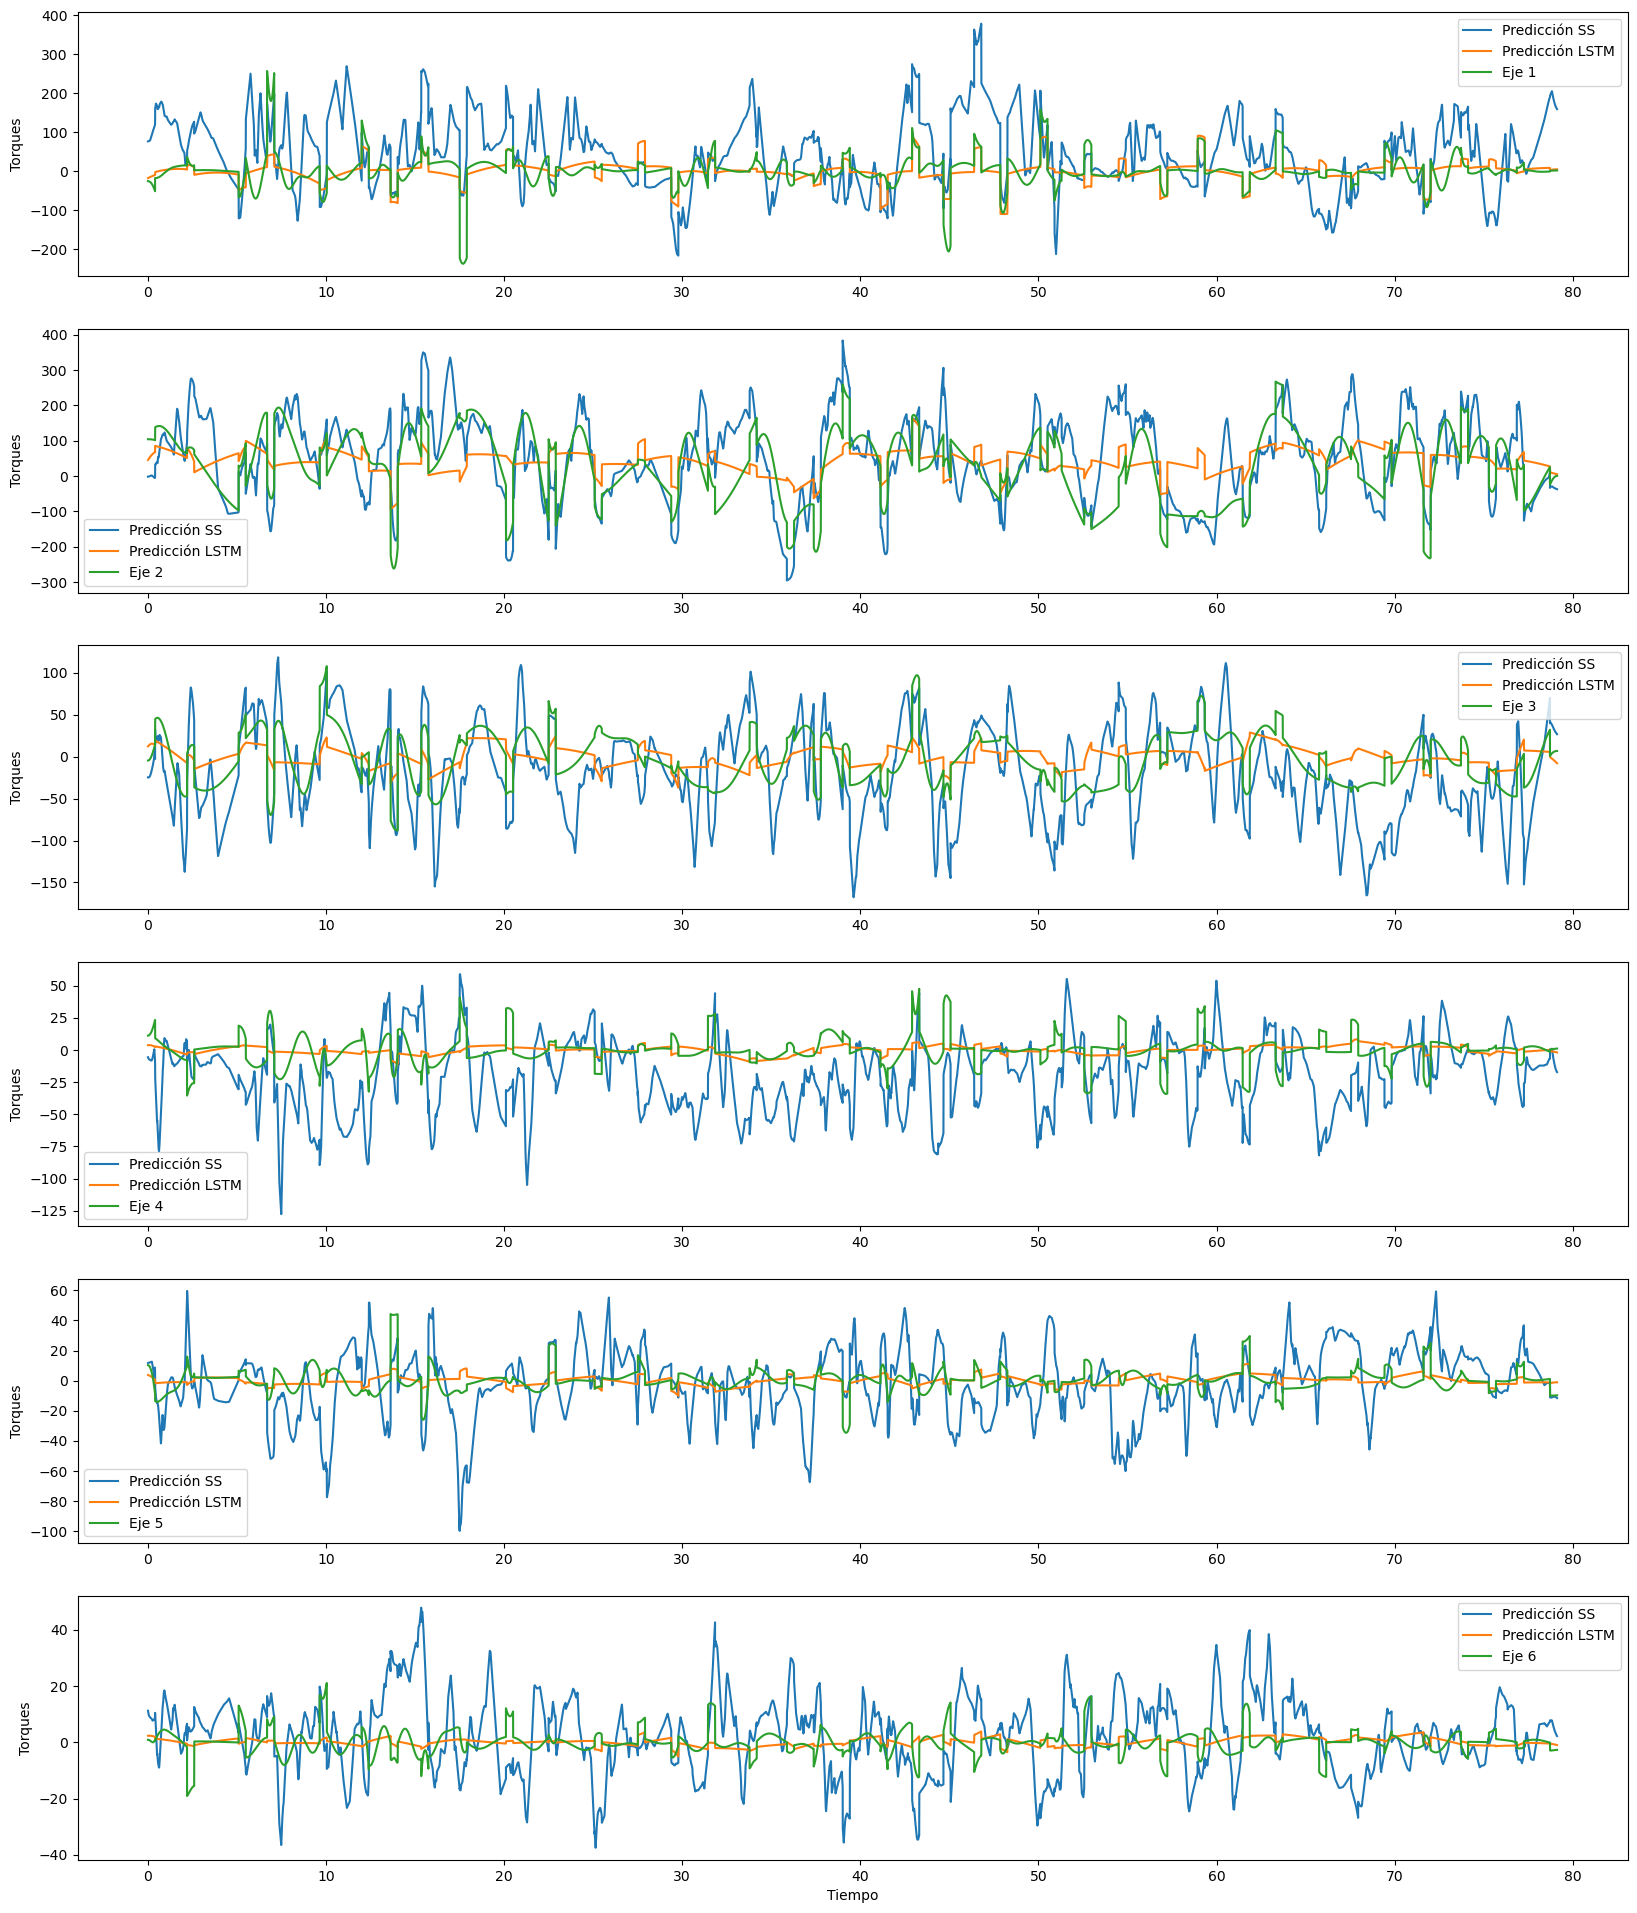

In [89]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 24))  # Cambia el tamaño según tus necesidades

# Grafico los resultados
for i in range(num_links):
  plt.subplot(num_links, 1, i+1)
  plt.plot(t_ref,tau_sim_FF_NN[:,i],label='Predicción SS')
  plt.plot(t_ref_LSTM,tau_sim_LSTM[:,i], label='Predicción LSTM')
  plt.plot(t_ref,outputs_ref[:,i],label=f'Eje {i+1}')
  plt.ylabel('Torques')
  plt.legend()

plt.xlabel('Tiempo');
plt.show()

# **Comparación de métricas de los modelos**

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compare_models(model1, model2, model1_name, model2_name, X_test1, y_test1, X_test2, y_test2):
    # Hacer predicciones para cada modelo en su propio conjunto de datos
    y_pred_model1 = model1.predict(X_test1)
    y_pred_model2 = model2.predict(X_test2)

    # Calcular métricas para model1 en su dataset
    mse_model1 = mean_squared_error(y_test1, y_pred_model1)
    mae_model1 = mean_absolute_error(y_test1, y_pred_model1)
    r2_model1 = r2_score(y_test1, y_pred_model1)

    # Calcular métricas para model2 en su dataset
    mse_model2 = mean_squared_error(y_test2, y_pred_model2)
    mae_model2 = mean_absolute_error(y_test2, y_pred_model2)
    r2_model2 = r2_score(y_test2, y_pred_model2)

    # Mostrar métricas para cada dataset
    print(f"Métricas del {model1_name} (Dataset 1):")
    print(f"MSE: {mse_model1:.4f}")
    print(f"MAE: {mae_model1:.4f}")
    print(f"R²: {r2_model1:.4f}")

    print(f"\nMétricas del {model2_name} (Dataset 2):")
    print(f"MSE: {mse_model2:.4f}")
    print(f"MAE: {mae_model2:.4f}")
    print(f"R²: {r2_model2:.4f}")

    # Opcional: Normalizar métricas (normalización simple usando el rango de los valores reales)
    range_y_test1 = np.max(y_test1) - np.min(y_test1)
    range_y_test2 = np.max(y_test2) - np.min(y_test2)

    mse_model1_normalized = mse_model1 / range_y_test1
    mse_model2_normalized = mse_model2 / range_y_test2

    print(f"\nMSE Normalizado para {model1_name}: {mse_model1_normalized:.4f}")
    print(f"MSE Normalizado para {model2_name}: {mse_model2_normalized:.4f}")

# Graficar curvas de pérdida durante el entrenamiento si tienes los históricos de entrenamiento
def plot_loss_curve(history1, model_name1, history2, model_name2):
    plt.plot(history1.history['loss'], label=f'Pérdida Entrenamiento {model_name1}')
    plt.plot(history1.history['val_loss'], label=f'Pérdida Validación {model_name1}')
    plt.plot(history2.history['loss'], label=f'Pérdida Entrenamiento {model_name2}')
    plt.plot(history2.history['val_loss'], label=f'Pérdida Validación {model_name2}')
    plt.title('Curvas de Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.gca().set_ylim(0, 0.01)
    plt.legend()
    plt.show()


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Métricas del Modelo SS (Dataset 1):
MSE: 0.0007
MAE: 0.0176
R²: 0.7783

Métricas del Modelo LSTM (Dataset 2):
MSE: 0.0104
MAE: 0.0740
R²: -0.0205

MSE Normalizado para Modelo SS: 0.0007
MSE Normalizado para Modelo LSTM: 0.0110


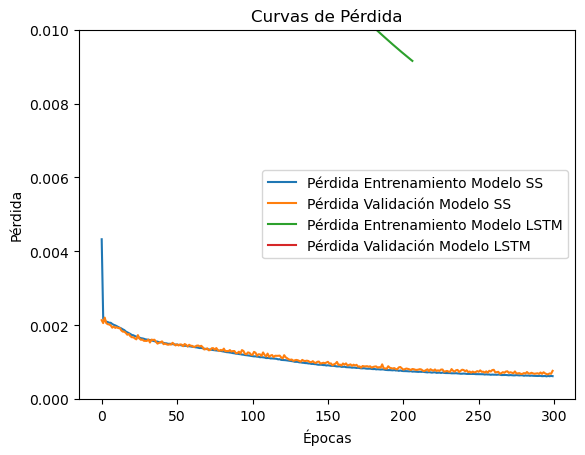

In [91]:
compare_models(FFNN_SS_network, LSTM_network,'Modelo SS', 'Modelo LSTM', X_test_SS, y_test_SS, X_test_LSTM, y_test_LSTM)
plot_loss_curve(FFNN_SS_history , 'Modelo SS', LSTM_history, 'Modelo LSTM')